## Data Preperation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [ ]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [ ]:
data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0
)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 9), (438, 9), (1022,), (438,))

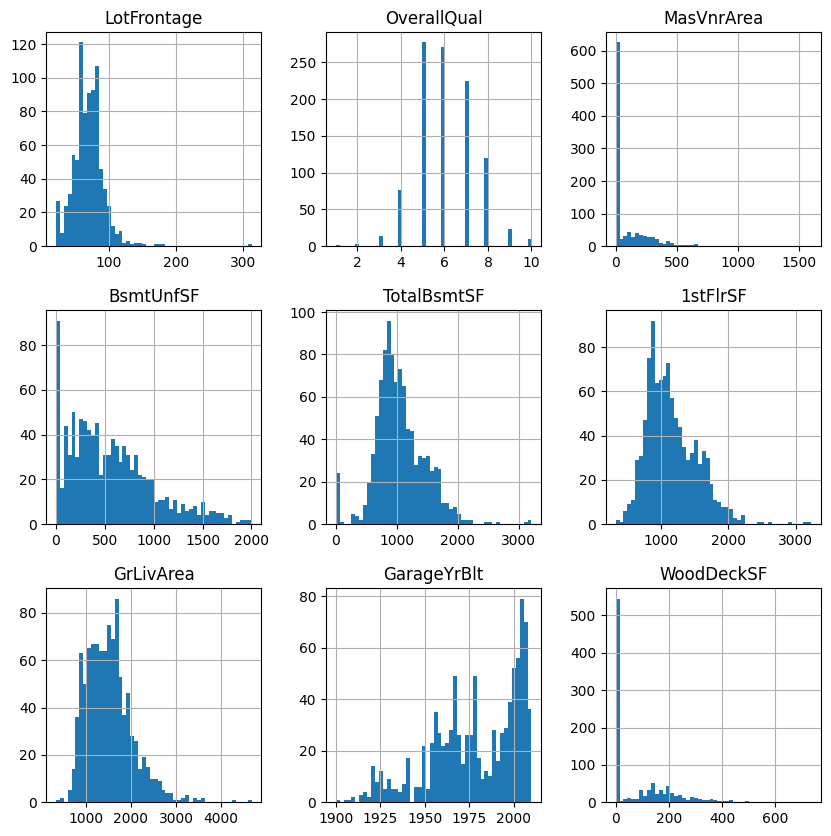

In [ ]:
# distribution
X_train.hist(bins=50,figsize=(10,10))
plt.show()

In [ ]:
X_train.isnull().sum()

,0
LotFrontage,189
OverallQual,0
MasVnrArea,5
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,54
WoodDeckSF,0


In [ ]:
X_test.isnull().sum()

,0
LotFrontage,70
OverallQual,0
MasVnrArea,3
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,27
WoodDeckSF,0


## Mean/Median Imputation

In [ ]:
var_to_impute = []
for var in X_train.columns:
  if X_train[var].isnull().sum()>0:
    var_to_impute.append(var)
var_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
imputation_dict = {}
for var in var_to_impute:
  imputation_dict[var] = X_train[var].median()
imputation_dict

{'LotFrontage': 69.0, 'MasVnrArea': 0.0, 'GarageYrBlt': 1979.0}

In [ ]:
X_train.fillna(imputation_dict,inplace=True)
X_test.fillna(imputation_dict,inplace=True)

In [ ]:
X_train.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,0
WoodDeckSF,0


In [ ]:
X_test.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,0
WoodDeckSF,0


## Arbitary Value Imputation

In [ ]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0
)

In [ ]:
X_train.isnull().sum()

,0
LotFrontage,189
OverallQual,0
MasVnrArea,5
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,54
WoodDeckSF,0


In [ ]:
X_test.isnull().sum()

,0
LotFrontage,70
OverallQual,0
MasVnrArea,3
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,27
WoodDeckSF,0


In [ ]:
var_to_impute = []
for var in X_train.columns:
  if X_train[var].isnull().sum()>0:
    var_to_impute.append(var)
var_to_impute

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
# finding range
X_train[var_to_impute].agg(['min','max'])

,LotFrontage,MasVnrArea,GarageYrBlt
min,21.0,0.0,1900.0
max,313.0,1600.0,2010.0


In [ ]:
imputation_dict = {
    'LotFrontage':999,
    'MasVnrArea':1999,
    'GarageYrBlt':2999
}
imputation_dict

{'LotFrontage': 999, 'MasVnrArea': 1999, 'GarageYrBlt': 2999}

In [ ]:
X_train.fillna(imputation_dict,inplace=True)
X_test.fillna(imputation_dict,inplace=True)

In [ ]:
X_train.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,0
WoodDeckSF,0


In [ ]:
X_test.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,0
WoodDeckSF,0


## Frequent Category Imputation

In [ ]:
cols_to_use = ["BsmtQual", "FireplaceQu", "SalePrice"]

In [ ]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 2), (438, 2))

In [ ]:
X_train.isnull().sum()

,0
BsmtQual,24
FireplaceQu,478


In [ ]:
X_test.isnull().sum()

,0
BsmtQual,13
FireplaceQu,212


In [ ]:
var_to_impute=[]
for var in X_train.columns:
  if X_train[var].isnull().sum()>0:
    var_to_impute.append(var)
var_to_impute

['BsmtQual', 'FireplaceQu']

In [ ]:
imputation_dict = {}
for var in var_to_impute:
  imputation_dict[var] = X_train[var].mode()[0]
imputation_dict

{'BsmtQual': 'TA', 'FireplaceQu': 'Gd'}

In [ ]:
X_train.fillna(imputation_dict,inplace=True)
X_test.fillna(imputation_dict,inplace=True)

In [ ]:
X_train.isnull().sum()

,0
BsmtQual,0
FireplaceQu,0


In [ ]:
X_test.isnull().sum()

,0
BsmtQual,0
FireplaceQu,0


## Missing Category Imputation

In [ ]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [ ]:
data.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 2), (438, 2))

In [ ]:
X_train.isnull().sum()

,0
BsmtQual,24
FireplaceQu,478


In [ ]:
X_test.isnull().sum()

,0
BsmtQual,13
FireplaceQu,212


In [ ]:
imputation_dict = {
    "BsmtQual": "Missing",
    "FireplaceQu": "Missing",
}

imputation_dict

{'BsmtQual': 'Missing', 'FireplaceQu': 'Missing'}

In [ ]:
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

In [ ]:
X_train.isnull().sum()

,0
BsmtQual,0
FireplaceQu,0


In [ ]:
X_test.isnull().sum()

,0
BsmtQual,0
FireplaceQu,0


## Missing Indicator

In [ ]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "BsmtQual",
    "FireplaceQu",
    "SalePrice",
]

In [ ]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [ ]:
data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,Gd,150,856,856,1710,NaN,2003.0,0,208500
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 11), (438, 11))

In [ ]:
var_nums = []
for var in X_train.columns:
  if X_train[var].dtype in ["int64","float64"]:
    var_nums.append(var)
var_nums

['LotFrontage',
 'OverallQual',
 'MasVnrArea',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'WoodDeckSF']

In [ ]:
var_cat = []
for var in X_train.columns:
  if X_train[var].dtype in ["object"]:
    var_cat.append(var)
var_cat

['BsmtQual', 'FireplaceQu']

In [ ]:
imputation_dict = {}
for var in var_nums:
  imputation_dict[var] = X_train[var].median()
imputation_dict

{'LotFrontage': 69.0,
 'OverallQual': 6.0,
 'MasVnrArea': 0.0,
 'BsmtUnfSF': 486.5,
 'TotalBsmtSF': 992.0,
 '1stFlrSF': 1095.0,
 'GrLivArea': 1479.0,
 'GarageYrBlt': 1979.0,
 'WoodDeckSF': 0.0}

In [ ]:
for var in var_cat:
  imputation_dict[var] = X_train[var].mode()[0]
imputation_dict

{'LotFrontage': 69.0,
 'OverallQual': 6.0,
 'MasVnrArea': 0.0,
 'BsmtUnfSF': 486.5,
 'TotalBsmtSF': 992.0,
 '1stFlrSF': 1095.0,
 'GrLivArea': 1479.0,
 'GarageYrBlt': 1979.0,
 'WoodDeckSF': 0.0,
 'BsmtQual': 'TA',
 'FireplaceQu': 'Gd'}

In [ ]:
indicator = [f"{var}_na" for var in imputation_dict.keys()]
indicator

['LotFrontage_na',
 'OverallQual_na',
 'MasVnrArea_na',
 'BsmtUnfSF_na',
 'TotalBsmtSF_na',
 '1stFlrSF_na',
 'GrLivArea_na',
 'GarageYrBlt_na',
 'WoodDeckSF_na',
 'BsmtQual_na',
 'FireplaceQu_na']

In [ ]:
X_train[indicator] = X_train.isna().astype(int)

In [ ]:
X_train

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,...,OverallQual_na,MasVnrArea_na,BsmtUnfSF_na,TotalBsmtSF_na,1stFlrSF_na,GrLivArea_na,GarageYrBlt_na,WoodDeckSF_na,BsmtQual_na,FireplaceQu_na
64,NaN,7,573.0,Gd,318,1057,1057,2034,NaN,1998.0,...,0,0,0,0,0,0,0,1,0,0
682,NaN,6,0.0,Gd,288,1291,1291,1291,Gd,1996.0,...,0,0,0,0,0,0,0,0,0,0
960,50.0,5,0.0,TA,162,858,858,858,NaN,NaN,...,0,0,0,0,0,0,0,1,1,0
1384,60.0,6,0.0,TA,356,560,698,1258,NaN,1939.0,...,0,0,0,0,0,0,0,1,0,0
1100,60.0,2,0.0,TA,0,290,438,438,NaN,1930.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,82.0,8,673.0,Gd,89,1252,1268,2365,Gd,1999.0,...,0,0,0,0,0,0,0,0,0,0
835,60.0,4,0.0,Gd,625,1067,1067,1067,NaN,1996.0,...,0,0,0,0,0,0,0,1,0,0
1216,68.0,6,0.0,NaN,0,0,1318,1902,NaN,1978.0,...,0,0,1,0,0,0,0,1,0,0
559,NaN,7,18.0,Gd,1374,1374,1557,1557,TA,2003.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test[indicator] = X_test.isna().astype(int)

In [ ]:
X_train.fillna(imputation_dict,inplace=True)
X_test.fillna(imputation_dict,inplace=True)

In [ ]:
X_train.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtQual,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
FireplaceQu,0
GarageYrBlt,0


In [ ]:
X_test.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtQual,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
FireplaceQu,0
GarageYrBlt,0


## CCA

In [ ]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "BsmtQual",
    "FireplaceQu",
    "SalePrice",
]

In [ ]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [ ]:
data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,FireplaceQu,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,Gd,150,856,856,1710,NaN,2003.0,0,208500
1,80.0,6,0.0,Gd,284,1262,1262,1262,TA,1976.0,298,181500
2,68.0,7,162.0,Gd,434,920,920,1786,TA,2001.0,0,223500
3,60.0,7,0.0,TA,540,756,961,1717,Gd,1998.0,0,140000
4,84.0,8,350.0,Gd,490,1145,1145,2198,TA,2000.0,192,250000


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0
)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 11), (438, 11), (1022,), (438,))

In [ ]:
# drop all rows where 'NA'
X_train_t = X_train.dropna()
X_test_t = X_test.dropna()
X_train_t.shape,X_test_t.shape

((415, 11), (170, 11))

In [ ]:
# drop certain variables
X_train_t = X_train.dropna(subset=["MasVnrArea", "BsmtQual"])
X_test_t = X_test.dropna(subset=["MasVnrArea", "BsmtQual"])
X_train_t.shape,X_test_t.shape

((993, 11), (422, 11))

## End Tail Imputation

In [15]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [16]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [17]:
data.head()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [18]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0
)

In [19]:
X_train.isnull().sum()

,0
LotFrontage,189
OverallQual,0
MasVnrArea,5
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,54
WoodDeckSF,0


In [20]:
var_na = []
for var in X_train.columns:
  if X_train[var].isnull().sum()>0:
    var_na.append(var)
var_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [21]:
imputation_dict = {}
for var in var_na:
  imputation_dict[var] = X_train[var].mean()+3*X_train[var].std()
imputation_dict

{'LotFrontage': 138.9022201686726,
 'MasVnrArea': 648.3947111415157,
 'GarageYrBlt': 2052.9707419772235}

In [22]:
X_train.fillna(imputation_dict,inplace=True)
X_test.fillna(imputation_dict,inplace=True)

In [23]:
X_train.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,0
WoodDeckSF,0


In [24]:
X_test.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
GarageYrBlt,0
WoodDeckSF,0


In [25]:
# IQR
X_train,X_test,y_train,y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0
)

IQR = X_train[var_na].quantile(0.75)-X_train[var_na].quantile(0.25)
IQR

,0
LotFrontage,22.0
MasVnrArea,170.0
GarageYrBlt,40.0


In [26]:
imputation_dict = {}
for var in var_na:
  imputation_dict[var] = X_train[var].quantile(0.75)+IQR[var]*3
imputation_dict

{'LotFrontage': 146.0, 'MasVnrArea': 680.0, 'GarageYrBlt': 2121.0}

In [27]:
X_train.fillna(imputation_dict, inplace=True)
X_test.fillna(imputation_dict, inplace=True)

## Random Sample

In [28]:
cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "BsmtQual",
    "FireplaceQu",
    "SalePrice",
]

In [29]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [30]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0
)

In [31]:
var_na = []
for var in X_train.columns:
  if X_train[var].isnull().sum()>0:
    var_na.append(var)
var_na

['LotFrontage', 'MasVnrArea', 'BsmtQual', 'FireplaceQu', 'GarageYrBlt']

In [32]:
for var in var_na:
    random_sample_train = (
        X_train[var].dropna().sample(X_train[var].isnull().sum(), random_state=0)
    )
    random_sample_test = (
        X_train[var].dropna().sample(X_test[var].isnull().sum(), random_state=0)
    )
    random_sample_train.index = X_train[X_train[var].isnull()].index
    random_sample_test.index = X_test[X_test[var].isnull()].index
    X_train.loc[X_train[var].isnull(), var] = random_sample_train
    X_test.loc[X_test[var].isnull(), var] = random_sample_test

In [33]:
X_train.isnull().sum()

,0
LotFrontage,0
OverallQual,0
MasVnrArea,0
BsmtQual,0
BsmtUnfSF,0
TotalBsmtSF,0
1stFlrSF,0
GrLivArea,0
FireplaceQu,0
GarageYrBlt,0


## Mean/Median per group

In [34]:
cols_to_use = [
    "LotShape",
    "OverallQual",
    "TotalBsmtSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [35]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [36]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0
)

In [37]:
var_na = []
for var in X_train.columns:
  if X_train[var].isnull().sum()>0:
    var_na.append(var)
var_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [38]:
data.head()

,LotFrontage,LotShape,OverallQual,MasVnrArea,TotalBsmtSF,GarageYrBlt,SalePrice
0,65.0,Reg,7,196.0,856,2003.0,208500
1,80.0,Reg,6,0.0,1262,1976.0,181500
2,68.0,IR1,7,162.0,920,2001.0,223500
3,60.0,IR1,7,0.0,756,1998.0,140000
4,84.0,IR1,8,350.0,1145,2000.0,250000


In [39]:
X_train.groupby('LotShape')[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].mean()

,LotFrontage,MasVnrArea,GarageYrBlt
LotShape,,,
IR1,74.158371,131.869565,1984.081325
IR2,80.550000,84.827586,1987.689655
IR3,119.200000,0.000000,1984.666667
Reg,67.185690,90.045526,1974.126456


In [41]:
imputation_dict = {}

for i in X_train["LotShape"].unique():
  imputation_dict[i] = (X_train[X_train["LotShape"]==i][var_na].mean().to_dict())

imputation_dict

{'Reg': {'LotFrontage': 67.18568994889267,
  'MasVnrArea': 90.04552590266876,
  'GarageYrBlt': 1974.126455906822},
 'IR1': {'LotFrontage': 74.15837104072398,
  'MasVnrArea': 131.8695652173913,
  'GarageYrBlt': 1984.0813253012047},
 'IR2': {'LotFrontage': 80.55,
  'MasVnrArea': 84.82758620689656,
  'GarageYrBlt': 1987.6896551724137},
 'IR3': {'LotFrontage': 119.2,
  'MasVnrArea': 0.0,
  'GarageYrBlt': 1984.6666666666667}}

In [42]:
for i in imputation_dict.keys():
  X_train[X_train["LotShape"]==i] = X_train[X_train["LotShape"]==i].fillna(imputation_dict[i])
  X_test[X_test["LotShape"]==i] = X_test[X_test["LotShape"]==i].fillna(imputation_dict[i])

In [43]:
X_train.isnull().sum()

,0
LotFrontage,0
LotShape,0
OverallQual,0
MasVnrArea,0
TotalBsmtSF,0
GarageYrBlt,0


## KNN imputation

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer

In [45]:
cols_to_use = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF',  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
    'SalePrice'
]

In [46]:
data = pd.read_csv("train.csv",usecols=cols_to_use)

In [48]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [49]:
X_train,X_test,y_train,y_test = train_test_split(
    data.drop("SalePrice",axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0
)

In [50]:
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

In [51]:
X_train.shape,X_test.shape

((1022, 36), (438, 36))

In [55]:
X_train.isnull().sum()

,0
MSSubClass,0
LotFrontage,189
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,5
BsmtFinSF1,0
BsmtFinSF2,0


In [56]:
imputer = KNNImputer(
    n_neighbors=5,
    weights="distance",
    metric="nan_euclidean",
)

In [57]:
imputer.fit(X_train)

KNNImputer(weights='distance')

In [58]:
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

In [60]:
train_t = pd.DataFrame(train_t,columns=X_train.columns)
test_t = pd.DataFrame(test_t,columns=X_test.columns)

In [62]:
train_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60.0,70.115142,9375.0,7.0,5.0,1997.0,1998.0,573.0,739.0,0.0,...,645.0,576.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0
1,120.0,42.533053,2887.0,6.0,5.0,1996.0,1997.0,0.0,1003.0,0.0,...,431.0,307.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2008.0
2,20.0,50.000000,7207.0,5.0,7.0,1958.0,2008.0,0.0,696.0,0.0,...,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
3,50.0,60.000000,9060.0,6.0,5.0,1939.0,1950.0,0.0,204.0,0.0,...,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0
4,30.0,60.000000,8400.0,2.0,5.0,1920.0,1950.0,0.0,290.0,0.0,...,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2009.0


In [63]:
train_t.isnull().sum()

,0
MSSubClass,0
LotFrontage,0
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
BsmtFinSF1,0
BsmtFinSF2,0


In [64]:
X_train[X_train['MasVnrArea'].isnull()]['MasVnrArea']

,MasVnrArea
420,NaN
490,NaN
642,NaN
824,NaN
921,NaN


In [65]:
train_t[X_train['MasVnrArea'].isnull()]['MasVnrArea']

,MasVnrArea
420,99.765717
490,34.106592
642,0.000000
824,375.749332
921,85.817715


## MICE

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [69]:
variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'A16']

data = pd.read_csv("creditApprovalUCI.csv",usecols=variables)
data.head()

,A2,A3,A8,A11,A14,A15,A16
0,30.83,0.000,1.25,1,202.0,0,1
1,58.67,4.460,3.04,6,43.0,560,1
2,24.50,NaN,NaN,0,280.0,824,1
3,27.83,1.540,3.75,5,100.0,3,1
4,20.17,5.625,1.71,0,120.0,0,1


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [71]:
X_train.isnull().sum()

,0
A2,11
A3,68
A8,68
A11,0
A14,7
A15,0


In [72]:
X_test.isnull().sum()

,0
A2,1
A3,24
A8,24
A11,0
A14,6
A15,0


In [76]:
imputer = IterativeImputer(
    estimator=BayesianRidge(),
    initial_strategy = 'mean',
    max_iter = 10,
    imputation_order='ascending',
    n_nearest_features=None,
    skip_complete=True,
    random_state=0,
)

imputer.fit(X_train)

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

train_t = pd.DataFrame(train_t, columns=X_train.columns)
test_t = pd.DataFrame(test_t, columns=X_test.columns)

In [77]:
train_t.isnull().sum()

,0
A2,0
A3,0
A8,0
A11,0
A14,0
A15,0


In [78]:
# compare
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [79]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((483, 6), (207, 6))

In [82]:
imputer_bayes = IterativeImputer(
    estimator = BayesianRidge(),
    max_iter=10,
    random_state=0
)

imputer_knn = IterativeImputer(
    estimator = KNeighborsRegressor(n_neighbors=5),
    max_iter=10,
    random_state=0
)

imputer_tree = IterativeImputer(
    estimator = DecisionTreeRegressor(max_features = 'sqrt',random_state=0),
    max_iter=10,
    random_state=0
)

imputer_missForest = IterativeImputer(
    estimator = ExtraTreesRegressor(n_estimators = 10,random_state=0),
    max_iter=10,
    random_state=0
)

In [83]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_tree.fit(X_train)
imputer_missForest.fit(X_train)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
                 random_state=0)

In [84]:
X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_tree = imputer_tree.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

In [85]:
predictors = [var for var in variables if var !='A16']

In [87]:
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_tree = pd.DataFrame(X_train_tree, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

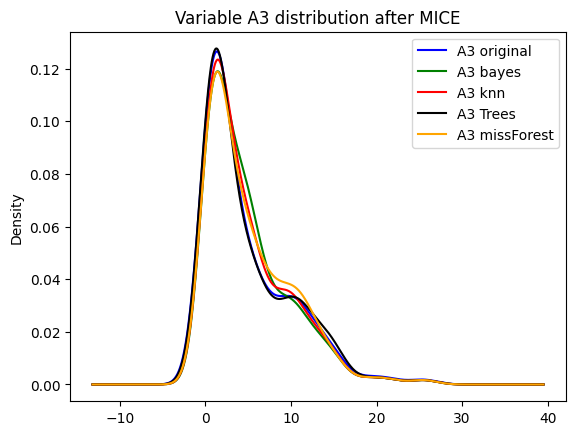

In [89]:
# plot the distribution of the imputed variable

fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['A3'].plot(kind='kde', ax=ax, color='green')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_tree['A3'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.title('Variable A3 distribution after MICE')
plt.show()